In [3]:
# https://stackoverflow.com/questions/50549128/boundary-enclosing-a-given-set-of-points

from scipy.spatial import Delaunay
import numpy as np


def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    tri = Delaunay(points)
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

/tmp/ipykernel_314/3661350321.py:11: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  edges = alpha_shape(points, alpha=0.25, only_outer=True)


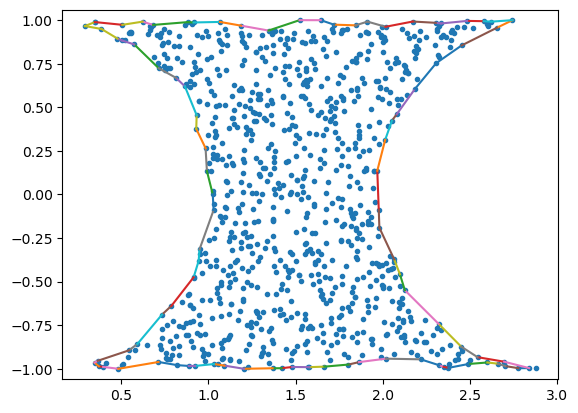

In [4]:
from matplotlib.pyplot import *

# Constructing the input point data
np.random.seed(0)
x = 3.0 * np.random.rand(2000)
y = 2.0 * np.random.rand(2000) - 1.0
inside = ((x ** 2 + y ** 2 > 1.0) & ((x - 3) ** 2 + y ** 2 > 1.0))
points = np.vstack([x[inside], y[inside]]).T

# Computing the alpha shape
edges = alpha_shape(points, alpha=0.25, only_outer=True)

# Plotting the output
figure()
axis('equal')
plot(points[:, 0], points[:, 1], '.')
for i, j in edges:
    plot(points[[i, j], 0], points[[i, j], 1])
show()

In [12]:
print(points)
print(edges)
print(edge)

[[ 1.64644051  0.62303694]
 [ 1.80829013  0.04631198]
 [ 1.63464955 -0.49895883]
 ...
 [ 1.44032342  0.66000589]
 [ 1.93159211  0.86561236]
 [ 1.50531939 -0.38332313]]
{(520, 401), (698, 563), (73, 117), (183, 654), (531, 370), (616, 200), (143, 300), (872, 345), (419, 884), (741, 691), (893, 596), (810, 290), (602, 807), (152, 625), (714, 84), (345, 681), (286, 604), (563, 269), (401, 838), (786, 606), (398, 73), (14, 602), (661, 74), (654, 810), (625, 173), (430, 590), (772, 857), (263, 168), (884, 689), (105, 634), (858, 14), (604, 244), (314, 524), (588, 858), (691, 520), (266, 816), (295, 419), (687, 589), (370, 772), (596, 642), (571, 588), (902, 834), (297, 31), (685, 201), (752, 593), (117, 27), (300, 893), (794, 263), (320, 752), (809, 105), (799, 286), (681, 224), (200, 683), (593, 797), (447, 786), (665, 398), (74, 872), (224, 731), (764, 571), (797, 741), (31, 320), (359, 430), (631, 794), (807, 687), (912, 297), (84, 789), (269, 447), (816, 631), (838, 314), (244, 295), (2

In [5]:
# stitch edges
def find_edges_with(i, edge_set):
    i_first = [j for (x,j) in edge_set if x==i]
    i_second = [j for (j,x) in edge_set if x==i]
    return i_first,i_second

def stitch_boundaries(edges):
    edge_set = edges.copy()
    boundary_lst = []
    while len(edge_set) > 0:
        boundary = []
        edge0 = edge_set.pop()
        boundary.append(edge0)
        last_edge = edge0
        while len(edge_set) > 0:
            i,j = last_edge
            j_first, j_second = find_edges_with(j, edge_set)
            if j_first:
                edge_set.remove((j, j_first[0]))
                edge_with_j = (j, j_first[0])
                boundary.append(edge_with_j)
                last_edge = edge_with_j
            elif j_second:
                edge_set.remove((j_second[0], j))
                edge_with_j = (j, j_second[0])  # flip edge rep
                boundary.append(edge_with_j)
                last_edge = edge_with_j

            if edge0[0] == last_edge[1]:
                break

        boundary_lst.append(boundary)
    return boundary_lst

In [7]:
edge = stitch_boundaries(edges)[0]
edge_arr = np.array(edge)
n_edge = edge_arr[0,:]

/tmp/ipykernel_314/2659149733.py:11: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  edges = alpha_shape(points, alpha=0.25, only_outer=True)


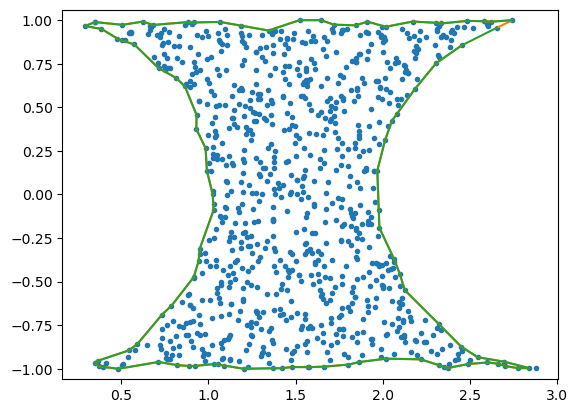

In [13]:
from matplotlib.pyplot import *

# Constructing the input point data
np.random.seed(0)
x = 3.0 * np.random.rand(2000)
y = 2.0 * np.random.rand(2000) - 1.0
inside = ((x ** 2 + y ** 2 > 1.0) & ((x - 3) ** 2 + y ** 2 > 1.0))
points = np.vstack([x[inside], y[inside]]).T

# Computing the alpha shape
edges = alpha_shape(points, alpha=0.25, only_outer=True)

# Plotting the output
figure()
axis('equal')
plot(points[:, 0], points[:, 1], '.')
plot(points[edge, 0], points[edge, 1])